In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/thailand_tourism.csv")
df.head()


EmptyDataError: No columns to parse from file

In [3]:
import pandas as pd
import random

# กำหนดค่าเริ่มต้น
years = [2022, 2023, 2024]
months = list(range(1, 13))

provinces = [
    ("Bangkok", "Central"),
    ("Chiang Mai", "North"),
    ("Phuket", "South"),
    ("Chonburi", "East"),
    ("Khon Kaen", "Northeast")
]

data = []

for year in years:
    for month in months:
        for province, region in provinces:
            tourists = random.randint(50000, 500000)
            revenue = round(tourists * random.uniform(1.5, 3.5) / 1000, 2)

            data.append([
                year, month, province, tourists, revenue, region
            ])

df = pd.DataFrame(
    data,
    columns=[
        "year", "month", "province",
        "tourists", "revenue_million_thb",
        "region"
    ]
)

df.head()


,year,month,province,tourists,revenue_million_thb,region
0,2022,1,Bangkok,217106,561.17,Central
1,2022,1,Chiang Mai,413083,867.19,North
2,2022,1,Phuket,444701,1002.62,South
3,2022,1,Chonburi,457565,1464.04,East
4,2022,1,Khon Kaen,181794,526.75,Northeast


In [4]:
df.to_csv("../data/raw/thailand_tourism.csv", index=False)


In [5]:
df = pd.read_csv("../data/raw/thailand_tourism.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 180 non-null    int64  
 1   month                180 non-null    int64  
 2   province             180 non-null    object 
 3   tourists             180 non-null    int64  
 4   revenue_million_thb  180 non-null    float64
 5   region               180 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 8.6+ KB


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 180 non-null    int64  
 1   month                180 non-null    int64  
 2   province             180 non-null    object 
 3   tourists             180 non-null    int64  
 4   revenue_million_thb  180 non-null    float64
 5   region               180 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 8.6+ KB


In [7]:
df.describe()


,year,month,tourists,revenue_million_thb
count,180.000000,180.000000,180.000000,180.000000
mean,2023.000000,6.500000,277531.938889,700.246722
std,0.818774,3.461682,139212.652023,397.015681
min,2022.000000,1.000000,51446.000000,95.490000
25%,2022.000000,3.750000,142156.750000,371.837500
50%,2023.000000,6.500000,276005.500000,670.145000
75%,2024.000000,9.250000,410884.750000,997.212500
max,2024.000000,12.000000,496061.000000,1584.060000


In [8]:
tourists_by_year = df.groupby("year")["tourists"].sum()
tourists_by_year


year
2022    16430239
2023    16710704
2024    16814806
Name: tourists, dtype: int64

In [9]:
tourists_by_province = (
    df.groupby("province")["tourists"]
    .sum()
    .sort_values(ascending=False)
)

tourists_by_province


province
Chonburi      10336705
Khon Kaen     10072506
Bangkok       10031612
Chiang Mai     9775029
Phuket         9739897
Name: tourists, dtype: int64

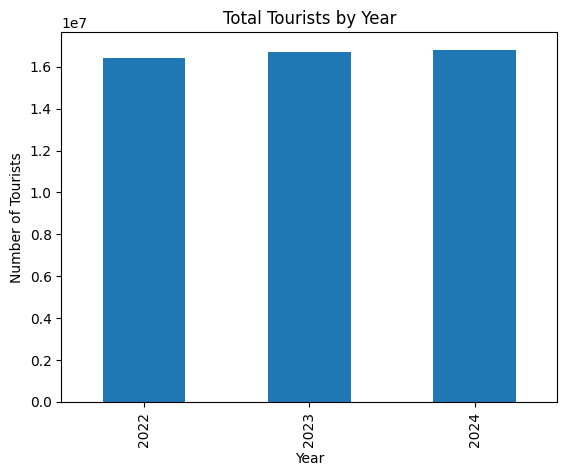

In [10]:
import matplotlib.pyplot as plt

tourists_by_year.plot(kind="bar")
plt.title("Total Tourists by Year")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.show()


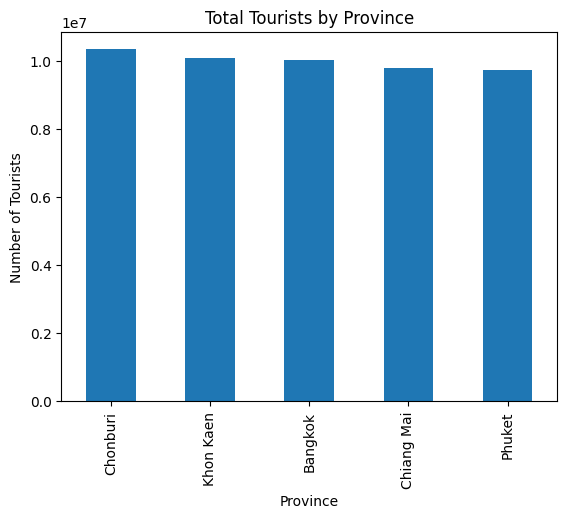

In [11]:
tourists_by_province.plot(kind="bar")
plt.title("Total Tourists by Province")
plt.xlabel("Province")
plt.ylabel("Number of Tourists")
plt.show()


In [12]:
tourists_by_month = df.groupby("month")["tourists"].sum()
tourists_by_month


month
1     4228005
2     4550604
3     3520773
4     4403638
5     4248497
6     4208265
7     4816376
8     4114274
9     3822738
10    3791014
11    4494042
12    3757523
Name: tourists, dtype: int64

In [13]:
tourists_by_month.sort_values(ascending=False)


month
7     4816376
2     4550604
11    4494042
4     4403638
5     4248497
1     4228005
6     4208265
8     4114274
9     3822738
10    3791014
12    3757523
3     3520773
Name: tourists, dtype: int64

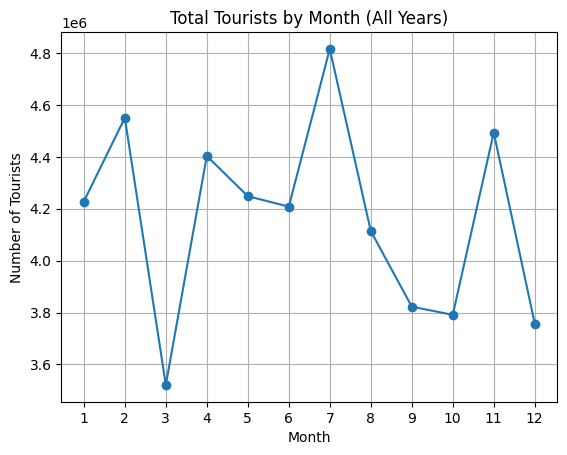

In [14]:
import matplotlib.pyplot as plt

tourists_by_month.plot(kind="line", marker="o")
plt.title("Total Tourists by Month (All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [15]:
monthly_province = (
    df.groupby(["month", "province"])["tourists"]
    .sum()
    .reset_index()
)

monthly_province.head()


,month,province,tourists
0,1,Bangkok,423893
1,1,Chiang Mai,1188280
2,1,Chonburi,758682
3,1,Khon Kaen,888620
4,1,Phuket,968530


In [21]:
df.to_csv("thailand_domestic_tourism.csv", index=False)


In [19]:
import pandas as pd

df = pd.read_csv("../data/raw/thailand_domestic_tourism.csv")
df.head()


,year,month,province,tourists,revenue_million_thb,region
0,2022,1,Bangkok,217106,561.17,Central
1,2022,1,Chiang Mai,413083,867.19,North
2,2022,1,Phuket,444701,1002.62,South
3,2022,1,Chonburi,457565,1464.04,East
4,2022,1,Khon Kaen,181794,526.75,Northeast


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 180 non-null    int64  
 1   month                180 non-null    int64  
 2   province             180 non-null    object 
 3   tourists             180 non-null    int64  
 4   revenue_million_thb  180 non-null    float64
 5   region               180 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 8.6+ KB


In [22]:
df.columns


Index(['year', 'month', 'province', 'tourists', 'revenue_million_thb',
       'region'],
      dtype='object')

In [23]:
df = df.rename(columns={
    "Year": "year",
    "Province": "province",
    "Number of Trips": "trips",
    "Tourism Revenue (Million THB)": "revenue_million_thb"
})


In [24]:
df.isnull().sum()


year                   0
month                  0
province               0
tourists               0
revenue_million_thb    0
region                 0
dtype: int64

In [25]:
df.duplicated().sum()


np.int64(0)

In [26]:
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['tourists'] = df['tourists'].astype(int)
df['revenue_million_thb'] = df['revenue_million_thb'].astype(float)


In [27]:
df[df['month'] < 1]
df[df['month'] > 12]


,year,month,province,tourists,revenue_million_thb,region


In [28]:
df[df['tourists'] < 0]


,year,month,province,tourists,revenue_million_thb,region


In [29]:
df[df['revenue_million_thb'] < 0]


,year,month,province,tourists,revenue_million_thb,region


In [30]:
df['province'] = df['province'].str.strip()
df['region'] = df['region'].str.strip()


In [31]:
df['date'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-01'
)


In [32]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 180 non-null    int64         
 1   month                180 non-null    int64         
 2   province             180 non-null    object        
 3   tourists             180 non-null    int64         
 4   revenue_million_thb  180 non-null    float64       
 5   region               180 non-null    object        
 6   date                 180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 10.0+ KB


,year,month,province,tourists,revenue_million_thb,region,date
0,2022,1,Bangkok,217106,561.17,Central,2022-01-01
1,2022,1,Chiang Mai,413083,867.19,North,2022-01-01
2,2022,1,Phuket,444701,1002.62,South,2022-01-01
3,2022,1,Chonburi,457565,1464.04,East,2022-01-01
4,2022,1,Khon Kaen,181794,526.75,Northeast,2022-01-01


In [33]:
df['year'].min(), df['year'].max()


(np.int64(2022), np.int64(2024))

In [34]:
df.groupby('year')['month'].nunique()


year
2022    12
2023    12
2024    12
Name: month, dtype: int64

In [35]:
yearly_summary = (
    df.groupby('year')[['tourists', 'revenue_million_thb']]
      .sum()
      .reset_index()
)

yearly_summary


,year,tourists,revenue_million_thb
0,2022,16430239,42060.27
1,2023,16710704,42820.66
2,2024,16814806,41163.48


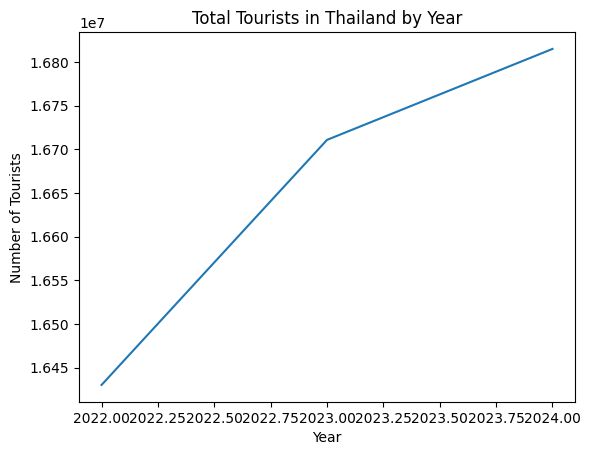

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    yearly_summary['year'],
    yearly_summary['tourists']
)
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.title("Total Tourists in Thailand by Year")
plt.show()


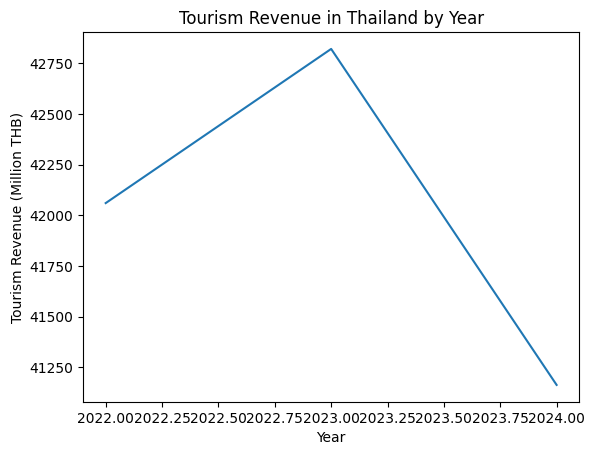

In [37]:
plt.figure()
plt.plot(
    yearly_summary['year'],
    yearly_summary['revenue_million_thb']
)
plt.xlabel("Year")
plt.ylabel("Tourism Revenue (Million THB)")
plt.title("Tourism Revenue in Thailand by Year")
plt.show()


In [38]:
yearly_summary['tourist_growth_%'] = (
    yearly_summary['tourists'].pct_change() * 100
)

yearly_summary['revenue_growth_%'] = (
    yearly_summary['revenue_million_thb'].pct_change() * 100
)

yearly_summary


,year,tourists,revenue_million_thb,tourist_growth_%,revenue_growth_%
0,2022,16430239,42060.27,NaN,NaN
1,2023,16710704,42820.66,1.707005,1.807858
2,2024,16814806,41163.48,0.622966,-3.870048


In [39]:
monthly_summary = (
    df.groupby('month')[['tourists', 'revenue_million_thb']]
      .mean()
      .reset_index()
)

monthly_summary


,month,tourists,revenue_million_thb
0,1,281867.000000,694.652000
1,2,303373.600000,790.196667
2,3,234718.200000,670.147333
3,4,293575.866667,774.834000
4,5,283233.133333,655.782000
5,6,280551.000000,695.859333
6,7,321091.733333,753.224667
7,8,274284.933333,630.094000
8,9,254849.200000,685.357333
9,10,252734.266667,628.314667


In [40]:
monthly_summary.sort_values(by='tourists', ascending=False)


,month,tourists,revenue_million_thb
6,7,321091.733333,753.224667
1,2,303373.600000,790.196667
10,11,299602.800000,768.349333
3,4,293575.866667,774.834000
4,5,283233.133333,655.782000
0,1,281867.000000,694.652000
5,6,280551.000000,695.859333
7,8,274284.933333,630.094000
8,9,254849.200000,685.357333
9,10,252734.266667,628.314667


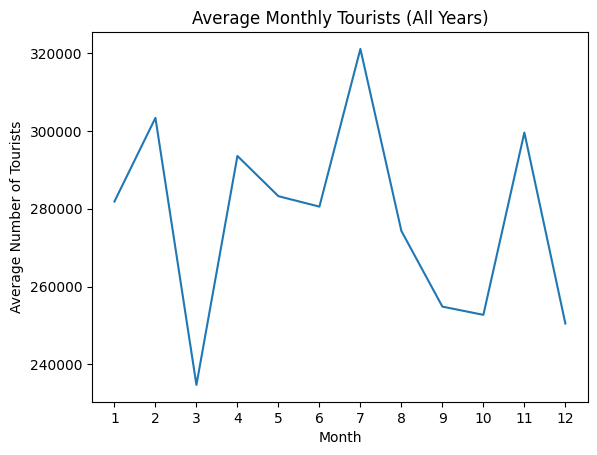

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    monthly_summary['month'],
    monthly_summary['tourists']
)
plt.xlabel("Month")
plt.ylabel("Average Number of Tourists")
plt.title("Average Monthly Tourists (All Years)")
plt.xticks(range(1, 13))
plt.show()


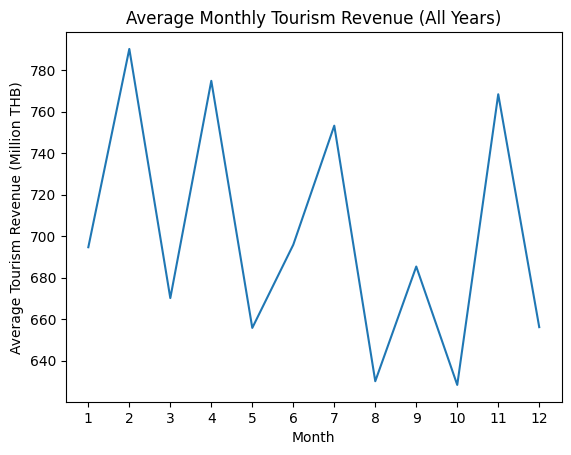

In [42]:
plt.figure()
plt.plot(
    monthly_summary['month'],
    monthly_summary['revenue_million_thb']
)
plt.xlabel("Month")
plt.ylabel("Average Tourism Revenue (Million THB)")
plt.title("Average Monthly Tourism Revenue (All Years)")
plt.xticks(range(1, 13))
plt.show()


In [43]:
monthly_year = (
    df.groupby(['year', 'month'])['tourists']
      .sum()
      .reset_index()
)

monthly_year.head()


,year,month,tourists
0,2022,1,1714249
1,2022,2,1403931
2,2022,3,1090999
3,2022,4,1277926
4,2022,5,1635681


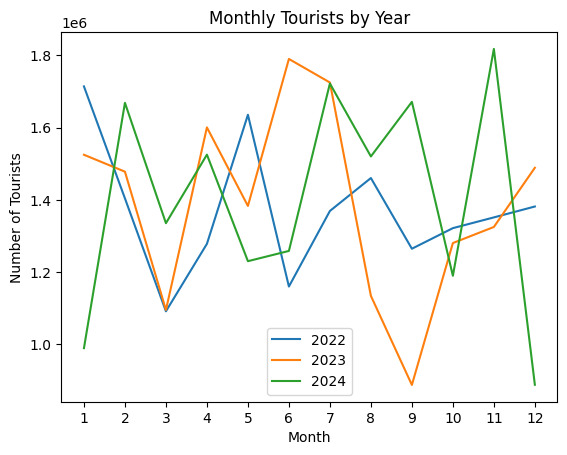

In [44]:
plt.figure()

for y in monthly_year['year'].unique():
    data = monthly_year[monthly_year['year'] == y]
    plt.plot(data['month'], data['tourists'], label=str(y))

plt.xlabel("Month")
plt.ylabel("Number of Tourists")
plt.title("Monthly Tourists by Year")
plt.xticks(range(1, 13))
plt.legend()
plt.show()


In [45]:
province_summary = (
    df.groupby('province')[['tourists', 'revenue_million_thb']]
      .sum()
      .reset_index()
)

province_summary.head()


,province,tourists,revenue_million_thb
0,Bangkok,10031612,24041.60
1,Chiang Mai,9775029,24827.68
2,Chonburi,10336705,26612.56
3,Khon Kaen,10072506,25966.14
4,Phuket,9739897,24596.43


In [46]:
top_tourists = province_summary.sort_values(
    by='tourists', ascending=False
).head(10)

top_tourists


,province,tourists,revenue_million_thb
2,Chonburi,10336705,26612.56
3,Khon Kaen,10072506,25966.14
0,Bangkok,10031612,24041.60
1,Chiang Mai,9775029,24827.68
4,Phuket,9739897,24596.43


In [47]:
top_revenue = province_summary.sort_values(
    by='revenue_million_thb', ascending=False
).head(10)

top_revenue


,province,tourists,revenue_million_thb
2,Chonburi,10336705,26612.56
3,Khon Kaen,10072506,25966.14
1,Chiang Mai,9775029,24827.68
4,Phuket,9739897,24596.43
0,Bangkok,10031612,24041.60


In [48]:
bottom_tourists = province_summary.sort_values(
    by='tourists', ascending=True
).head(10)

bottom_tourists


,province,tourists,revenue_million_thb
4,Phuket,9739897,24596.43
1,Chiang Mai,9775029,24827.68
0,Bangkok,10031612,24041.60
3,Khon Kaen,10072506,25966.14
2,Chonburi,10336705,26612.56


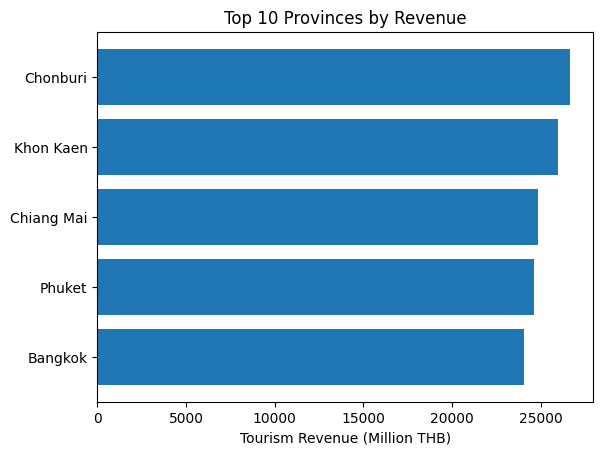

In [49]:
plt.figure()
plt.barh(
    top_revenue['province'],
    top_revenue['revenue_million_thb']
)
plt.xlabel("Tourism Revenue (Million THB)")
plt.title("Top 10 Provinces by Revenue")
plt.gca().invert_yaxis()
plt.show()


In [50]:
df_2024 = df[df['year'] == 2024]

province_2024 = (
    df_2024.groupby('province')[['tourists', 'revenue_million_thb']]
    .sum()
    .reset_index()
)


In [51]:
province_2024.sort_values(by='tourists', ascending=False).head(10)


,province,tourists,revenue_million_thb
0,Bangkok,3653903,8103.45
2,Chonburi,3494629,8744.90
3,Khon Kaen,3374573,8494.63
1,Chiang Mai,3365953,9018.10
4,Phuket,2925748,6802.40


In [52]:
tourists_by_month.to_csv("../outputs/tables/tourists_by_month.csv")


In [53]:
df.to_csv("../data/processed/thailand_tourism_clean.csv", index=False)


In [54]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 180 non-null    int64         
 1   month                180 non-null    int64         
 2   province             180 non-null    object        
 3   tourists             180 non-null    int64         
 4   revenue_million_thb  180 non-null    float64       
 5   region               180 non-null    object        
 6   date                 180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 10.0+ KB


,year,month,province,tourists,revenue_million_thb,region,date
0,2022,1,Bangkok,217106,561.17,Central,2022-01-01
1,2022,1,Chiang Mai,413083,867.19,North,2022-01-01
2,2022,1,Phuket,444701,1002.62,South,2022-01-01
3,2022,1,Chonburi,457565,1464.04,East,2022-01-01
4,2022,1,Khon Kaen,181794,526.75,Northeast,2022-01-01
